# Introdução à Rede Discreta de Hopfield

É um algorítmo simples pois não demanda muito conhecimento de matemática para ser utilizado.

Começando pelo nome, por ser "Discreta", é uma rede que trabalha apenas com vetores binários, mas que porém, utilizaremos números bipolares (ao invés de 0 e 1 usaremos -1 e 1). Não podemos usar zero por duas grandes razões:

* Primeiro que zero irá reduzir o valor da informação dentro da rede;
* O segundo motivo é que os vetores bipolares são ortogonais (opostos), o que é crítico para o funcionamento correto desta rede neural.

## A Rede

A unidade em Hopfield são limites binários, ou seja, a unidade só pode ter dois valores (que como já vimos são -1 e 1) e são determinados simplesmente se a entrada excede o limite.

Cada par de unidades $i$ e $j$ possui uma conexão descrita como peso $w_{ij}$ e a rede Hopfield pode ser descrita como um grafo $G = (V, f)$, onde $V$ é um conjunto de neurônios **McCulloch-Pitts** (um modelo matemático dos neurônios biológicos que recebe entradas excitatórias e inibitórias em seus "dendritos" que irão determinar a saída) e $f : V^2 \rightarrow \mathcal{R}$ a função que determina o valor de um par de unidades (o peso da conexão).

As conexões na rede Hopfield geralmente possuem as seguintes restrições:

* $w_{ii} = 0, \forall{i}$ - nenhuma unidade se conecta com si própria;
* $w_{ij} = w_{ji}, \forall{i,j}$ - as conexões são simétricas.

A restrição de simetria garante que a função de energia decresca monotonicamente (de modo invariável e repetitivo) enquanto vai seguindo as regras de ativação.

![Rede Neural Hopfield com 5 unidades](images/HopfieldNetwork.png)

### Atualização de Pesos

Para atualizar o valor de uma unidade usa-se a seguinte regra:

$$
s_i \leftarrow \left\{ \begin{matrix} +1 & \sum_{j} w_{ij}s_j \ge \theta_{ij} \\ -1  \end{matrix} \right.
$$

onde:

* $w_{ij}$ - peso da conexão entre as unidades $j$ e $i$;
* $s_i$ - estado da unidade $i$;
* $\theta_i$ - o limite da unidade $i$;

As atualizações podem ocorrer de dois modos:

* **Assíncrono** - apenas uma unidade é atualizada de cada vez. Esta unidade pode ser escolhida randomicamente, ou uma ordem pré-definida pode ser imposta desde o começo;
* **Síncrona** - todas unidades são atualizadas ao mesmo tempo. Isto requer um mecanismo de um relógio central para manter a sincronização. Este método é considerado menos realista, tendo em vista que não se observa tal "relógio" nas redes neurais biológicas.

#### Neurônios se "atraem" ou se "repelem"

O peso entre duas unidades possui um impacto poderoso no valor dos neurônios. Considere o peso de conexão $w_{ij}$ entre dois neurônios $i$ e $j$. Se $w_{ij} \gt 0$, a seguinte regra de atualização se aplica:

* quando $s_j = 1$, a contribuição de $j$ na somatória dos pesos é positiva. Assim, $s_i$ é pushado na direção do valor $s_i = 1$;
* quando $s_j = -1$, a contribuição de $j$ na somatória dos pesos é negativa. Então, mais uma vez, $s_i$ é empurrado na direção do valor $s_i = -1$.

Assim, os valores dos neurônios $i$ e $j$ irão convergir se o peso for positivo. Do mesmo modo irão divergir se o peso for negativo.

### Energia

A rede Hopfield possui um valor escalar associado com cada estado da rede, referido como "energia" $E$ da rede, onde:

$$
E = - \frac{1}{2}\sum_{ij} w_{ij} s_i s_j + \sum_{i} \theta_i s_i
$$

Esta quantificação é chamada "energia" pois ela decrementa ou se mantém conforme a rede é atualizada. Sob repetidas atualizações a rede eventualmente irá convergir para um estado de "mínimo local" da função de energia (é considerada uma função **Lyapunov**, ou seja, prova o equilíbrio de uma equação diferencial ordinária - contém funções e suas derivativas com apenas uma variável independente). Assim, se o estado atinge o "mínimo local" da função de energia é um estado estável para a rede.

### Inicializando e Executando

A inicialização implica simplesmente em definir os valores das unidades e o padrão desejado. Repetidas atualizações são executadas até a rede convergir para padrão atrator. Convergência é geralmente garantida, pois **Hopfield** provou que atratores deste sistema dinâmico não linear é estável, não periódico ou caótico. Todavia, no contexto de redes Hopfield, um padrão atrator é um estado final, um padrão que não pode mais mudar qualquer valor.

## Procedimento de Treino

Treinar uma rede Hopfield envolve baixar a energia dos estados que a rede se "lembra". Isto permite que a rede sirva como um sistema de memória endereçável, isto é, que a rede irá convergir para um estado "lembrado" mesmo se for dado apenas uma parte de seu estado. A rede pode ser utilizada para se recuperar de uma entrada distorcida do estado treinado que seja similar à entrada original. Isto é chamdo de "memória associativa" porque recupera memória com base em similaridade. Se treinamos uma rede Hopfield com cinco unidades de modo que o estado $(1, -1, 1, -1, 1)$ seja a energia mínima, e damos à rede o estado $(1, -1, -1, -1, 1)$ ela irá convergir para $(1, -1, 1, -1, 1)$. Assim, a rede é propriamente treinada quando a energia dos estados que a rede de lembrar são "locais mínimas".

## Regras de Aprendizado

Uma regra de aprendizado deve, desejavelmente, possuir as seguintes propriedades:

* *Local* - é *local* se cada peso é atualizado usando informação disponível para os neurônios de cada lado da conexão com o qual está associado o peso em particular;
* *Incremental* - é *incremental* se novos padrões podem ser aprendidos sem o uso de informação de padrões mais antigos que foram utilizados durante o treinamento. Isto é, quando um novo padrão é usado para o treino, os novos valores para os pesos apenas dependem dos valores anteriores e do novo padrão.

Estas propriedades são desejáveis, pois regras de aprendizado que os satisfazem são biologicamente plausíveis. Por exemplo, nosso cérebro está sempre aprendendo novos padrões e podemos assumir que nosso aprendizado é incremental. Um sistema de aprendizado que não é incremental só pode ser treinado apenas uma única vez com um volume enorme de dados de treino.

### Regra de Aprendizado **Hebbian**

A teoria neurocientífica de **Hebbian** afirma que um incremento na eficiência sináptica vem da repetição persistente do estímulo da célula pré-sináptica (sinapse do neurônio de origem) na célula pós-sináptica (sinapse do neurônio de destino) numa tentativa de explicar a plasticidade da sinapse - a adaptabilidade dos neurônios cerebrais durante o processo de aprendizado.

A regra é local e incremental e para redes Hopfield é implementada do seguinte modo:

$$
w_{ij} = \frac{1}{n} \sum_{\mu=1}^{n} \epsilon_{i}^{\mu} \epsilon_{j}^{\mu}
$$

onde $\epsilon_{i}^{\mu}$ representa o bit $i$ do padrão $\mu$.

Se os bits correspondentes aos neurônios $i$ e $j$ são iguais no padrão $\mu$, então o produto $\epsilon_{i}^{\mu} \epsilon_{j}^{\mu}$ será positivo. Isto irá produzir um efeito positivo no peso $w_{ij}$ e os valores de $i$ e $j$ tendem a serem iguais. O oposto acontece se os bits correspondendo aos neurônios $i$ e $j$ são diferentes.

### Regra de Aprendizado **Storkey**

**Storkey** demonstrou em 1997 que usando-a se tem uma capacidade maior do que se utilizarmos a regra **Hebbian**. A matriz de pesos do atrator de uma rede neural segue a regra se:

$$
w_{ij}^{\nu} = w_{ij}^{\nu-1} + \frac{1}{n} \epsilon_{i}^{\nu} \epsilon_{j}^{\nu} -\frac{1}{n} \epsilon_{i}^{\nu} h_{ji}^{\nu} - \frac{1}{n} \epsilon_{j}^{\nu} h_{ij}^{\nu}
$$

onde

$$
h_{ij}^{\nu} = \sum_{k=1; i \ne k \ne j}^{n} w_{ik}^{\nu-1} \epsilon_{k}^{\nu}
$$

é a forma de um "campo local" no neurônio $i$.

Esta regra de aprendizado é *local* pois as sinapses levam em consideração apenas neurônios próximos. A regra faz uso de mais informação do padrão e pesos que a generalização da regra de **Hebbian** em função do efeito de "campo local".

## Padrões Espúrios

Padrões utilizados pela rede para treinamento (chamados estados recuperados) se tornam atratores do sistema. Repetidas atualizações irão eventualmente levar à convergência para um dos estados recuperados. Todavia, algumas vezes, a rede irá convergir para padrões espúrios (diferentes dos padrões utilizados no treinamento). A energia destes padrões espúrios é também um "mínimo local". Para cada padrão armazenado $x$, a negação $-x$ é também um padrão espúrio.

Um estado espúrio pode ser uma combinação linear (expressão construída a partir de um conjunto de termos que são multiplicados por uma constante e somando-se os resultados) de um número ímpar de estados recuperados. Por exemplo, quando usamos 3 padrões $\mu_1$, $\mu_2$ e $\mu_3$, podemos obter o seguinte padrão espúrio:

$$
\epsilon_{i}^{mix} = \pm sgn \left( \pm \epsilon_i^{\mu_1} \pm \epsilon_i^{\mu_2} \pm \epsilon_i^{\mu_3} \right) 
$$

Padrões que possuem um número par de estados não levam a padrões espúrios pois somam zero.

## Treinando uma Rede

Não é possível usar uma rede sem padrões armazenados nela. Então o primeiro passo é treinar esta rede. Para isto basta inserir um produto externo entre um vetor de entrada e o vetor transposto:

$$
W = x . x^T = \begin{bmatrix} 
    x_1 \\ x_2 \\ \vdots \\ x_n 
\end{bmatrix} . \begin{bmatrix} 
    x_1 & x_2 & \cdots & x_n 
\end{bmatrix} = \begin{bmatrix} 
    x_1^2 & x_1 x_2 & \cdots & x_1 x_n \\
    x_2 x_1 & x_2^2 & \cdots & x_2 x_n \\
    \vdots \\
    x_n x_1 & x_n x_2 & \cdots & x_n^2 
\end{bmatrix}
$$

$W$ é a matriz de pesos e $x$ é o vetor de entrada. Cada valor $x_i$ no vetor de entrada só podem ter os valores $-1$ e $1$. Na diagonal da matriz teremos valores elevados ao quadrado e veremos apenas $1$ nestas posições - então não podemos ter informação útil e assim registramos $0$ nestas posições para evitar contribuições inválidas para o resultado. No final nossa configuração fica sendo:

$$
W = xx^T - 1 = \begin{bmatrix} 
    0 & x_1 x_2 & \cdots & x_1 x_n \\
    x_2 x_1 & 0 & \cdots & x_2 x_n \\
    \vdots \\
    x_n x_1 & x_n x_2 & \cdots & 0 
\end{bmatrix}
$$

Onde $I$ é a matriz identidade (uma matriz quadrada ($n \times n$) com valor $1$ nas posições diagonais e $0$ em todo o resto).

Para cada padrão adicional basta repetir o procedimento e adicionar o resultado à matriz anterior:

$$
W = W_{old} + W_{new}
$$

Isto irá gerar um novo peso que será válido para os dois padrões armazenados. A todo momento podemos adicionar novos padrões, bastando repetir a fórmula. Se quisermos adicionar simultaneamente vários padrões à rede basta partir da matriz ($X \in \mathcal{R}^{m \times n}$) onde cada linha é o vetor de entrada, basta obter o produto entre a matriz transposta e ela própria:

$$
W = X^TX - mI
$$

Onde $I$ é a matriz identidade ($I \in \mathcal{R}^{n \times n}$), $n$ é o número de pesos e $m$ é o número de padrões na matriz $X$. O termo $mI$ remove todos os valores da diagonal (na prática não se cria uma matriz identidade só para zerar a diagonal e as bibliotecas de álgebra linear possuem funções que zeram os valores para nós - **NumPy** por exemplo usa [numpy.fill_diagonal](https://numpy.org/doc/stable/reference/generated/numpy.fill_diagonal.html)).

### Exemplo

Comecemos por um vetor $u$:

$$
u = \begin{bmatrix}
    1 \\
    -1 \\
    1 \\
    -1 \\
\end{bmatrix}
$$

Assumimos que a rede não possui nenhum padrão registrado e $u$ vai ser o primeiro:

$$
U = uu^T = \begin{bmatrix}
    1 \\
    -1 \\
    1 \\
    -1 \\
\end{bmatrix} \begin{bmatrix}
    1 & -1 & 1 & -1 
\end{bmatrix} = \begin{bmatrix}
    1 & -1 & 1 & -1 \\
    -1 & 1 & -1 & 1 \\
    1 & -1 & 1 & -1 \\
    -1 & 1 & -1 & 1    
\end{bmatrix}
$$

O resultado em $U$ é o nosso vetor de entrada repetido $4$ vezes com o mesmo ou o sinal invertido. A primeira e terceira colunas (ou linhas, tanto faz pois a matriz é simétrica) são idênticas ao vetor de entrada. A segunda e quarta colunas (ou linhas, mais uma vez) são também o mesmo porém com o sinal inverso. Isto acontece porque temos $1$ nas primeira e terceira posições e $-1$ nas demais. Para obter os pesos, removes os valores $1$ da diagonal:

$$
W = U - I = \begin{bmatrix}
    1 & -1 & 1 & -1 \\
    -1 & 1 & -1 & 1 \\
    1 & -1 & 1 & -1 \\
    -1 & 1 & -1 & 1
\end{bmatrix} - \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1
\end{bmatrix} = \begin{bmatrix}
    0 & -1 & 1 & -1 \\
    -1 & 0 & -1 & 1 \\
    1 & -1 & 0 & -1 \\
    -1 & 1 & -1 & 0
\end{bmatrix}
$$

$I$ é a matriz identidade e $I \in \mathcal{R}^{n \times n}$ e $n$ é o número de pesos do vetor de entrada.

## Recuperação da Memória

Uma vantagem de uma rede neural autoassociativa é permitir recuperar padrões da memória usando apenas informação parcial do padrão desejado. Vamos abordar as duas técnicas disponíveis.

### Síncrona

A abordagem síncrona é a mais simples. Para resgatar um padrão da memória basta multiplicar a matriz de pesos pelo vetor de entrada:

$$
s = W \cdot x = \begin{bmatrix}
    w_{11} & w_{12} & \cdots & w_{1n} \\
    w_{21} & w_{22} & \cdots & w_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    w_{n1} & w_{n2} & \cdots & w_{nn}
\end{bmatrix} \begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
\end{bmatrix} \begin{bmatrix}
    w_{11}x_1 + w_{12}x_2 + \cdots + w_{1n}x_n \\
    w_{21}x_1 + w_{22}x_2 + \cdots + w_{2n}x_n \\
    \vdots \\
    w_{n1}x_1 + w_{n2}x_2 + \cdots + w_{nn}x_n
\end{bmatrix}
$$

O resultado é a soma de todos os pesos cujos valores são inteiros com iguais ou menores que o número de padrões dentro da matrix. O valor para $s_i$ não necessariamente vai resultar em $-1$ ou $1$ portanto operações adicionais serão necessárias para garantir a bipolaridade a partir do vetor $s$.

Relembrando, durante o treinamento salvamos nossos padrões $n$ vezes (onde $n$ é o número de unidades dos vetores) dentro do peso. Quando armazenamos mais padrões temos interceptações entre eles e cada padrão adiciona algum "ruído " aos outros. Então, após aplicarmos o produto entre a matrix $W$ e $x$ para cada valor do vetor $x$ nós iremos recuperar o vetor com um pouco deste ruído. Para $x_1$ obtemos a primeira coluna da matrix $W$, para $x_2$ a segunda coluna e assim por diante. Então somamos todos estes vetores. Se temos, por exemplo, $3$ vetores, dois com valor $1$ na primeira posição e o terceir com o valor $-1$, o vencedor será o $1$. Se operarmos com uma função de sinal, o resultado será $1$ se o valor total for maior que zero, e $-1$ se não:

\begin{align*}
    sign(x) = \left\{ \begin{matrix}
        1 & x : \ge 0 \\
        -1 & x : \lt 0 \\
    \end{matrix} \right.  \\
    y = sign(s)
\end{align*}

### Assíncrona

Na abordagem síncrona, ao alterarmos um dos valores do vetor de entrada, este valor pode alterar a saída e pode não convergir para o padrão conhecido. Uma solução seria utilizar a abordagem **assíncrona**. Esta é mais parecida com  uma memória real. Neste mecanismo a rede ativa um neurônio aleatório ao invés de todos - chama-se isto **disparo de neurônios**. Repetimos este processo várias vezes e em algum momento a rede irá convergir para um padrão:

No exemplo temos uma matriz de pesos $W$ e um padrão $x$ dentro dela:

\begin{align*}
    W &= \begin{bmatrix}
        0 & 1 & -1 \\
        1 & 0 & -1 \\
        -1 & -1 & 0
    \end{bmatrix} \\
    x &= \begin{bmatrix}
        1 \\
        1 \\
        -1
    \end{bmatrix}
\end{align*}

Agora temos um vetor $x'$ do qual desejamos recuperar o padrão:

$$
x' = \begin{bmatrix}
    1 \\
    -1 \\
    -1
\end{bmatrix}
$$

Na primeira iteração um neurônio dispara. Vamos determinar que seja o segundo. Então vamos multiplicar a primeira coluna pelo valor selecionado:

$$
x'_{2} = sign \left( 
    \begin{bmatrix} 1 -1 -1 \end{bmatrix} \cdot \begin{bmatrix}
        1 \\
        0 \\
        -1 
    \end{bmatrix}
\right) = sign(2) = 1
$$

Após esta operação montamos o novo valor no vetor de entrada $x$:

$$
x' = \begin{bmatrix}
    1 \\
    1 \\
    -1
\end{bmatrix}
$$

Na primeira iteração o valor é exatamente o mesmo de $x$, porém podemos continuar e nesta vamos disparar o terceiro neurônio:

$$
x'_{3} = sign \left( 
    \begin{bmatrix} 1 1 -1 \end{bmatrix} \cdot \begin{bmatrix}
        -1 \\
        -1 \\
        0 
    \end{bmatrix}
\right) = sign(-2) = -1
$$

Agora $x'_{3}$ é exatamente igual ao vetor $x'$ então não precisamos atualizá-lo - *se o fizermos iremos obter sempre o mesmo resultado*.

## Limite da memória

Não é possível armazenar um número infinito de vetores dentro da rede. Existem duas regras básicas que regulam isso.

Considere $n$ o número de valores do vetor de entrada e $m$ o número de padrões que desejamos armazenar na rede. A primeira regra determina uma razão entre as dimensões $m$ e $n$:

$$
m \approx 0.18n
$$

Vamos supor, por exemplo, que temos imagens dos números de $0$ a $9$ armazenados como vetores bipolares (a imagem é em preto e branco). A probabilidade de vermos células brancas e pretas é a mesma? Antes de responder é necessário observar o tipo de padrão e em como ele foi formatado.

A segunda regra é uma proporção logarítmica:

$$
m = \left\lfloor \frac{n}{2 \cdot \log{n}} \right\rfloor
$$

As duas regras são boas o suficiente para determinar o limite da memória com base na natureza dos dados porém em inúmeras situações estas regras podem não representar a realidade.

## Alucinações

Algumas vezes a saída da rede pode ser algo inexperado. Para entender como isso pode acontecer, é necessário definir a função de energia da rede:

$$
E = -\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^m w_{ij} x_i x_j + \sum_{i=1}^n \theta_i x_i
$$

Onde $w_{ij}$ é o peso entre a linha $i$ e a coluna $j$, $x_i$ é o $i$-ésimo valor do vetor $x$, $\theta$ é um limite que define as margens da função de sinal (por esta razão $\theta$ é zero para uma rede **Hopfield**) e em termos de álgebra linear podemos re-escrever esta equação:

$$
E = -\frac{1}{2} x^T W x
$$

Porém em álgebra linear podemos trabalhar apenas com o vetor $x$ e não podemos utilizar a matrix $X$ com múltiplos vetores de entrada ao invés de $x$ nesta fórmula. Para uma função de energia estamos interessados em encontrar um valor mínimo e por isso o valor negativo no início da equação.

Vamos assumir que o vetor $x$ pode ser contínuo de modo que possamos observá-lo usando dois parâmetros e temos dois vetores $[1, -1]$ e $[-1, 1]$ armazenados dentro da rede:

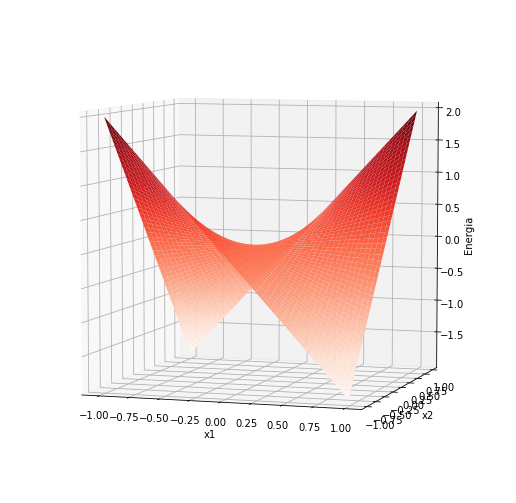

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def energy(input_vector):
    input_vector = np.array(input_vector)
    X = np.array([[1, -1], [-1, 1]])
    weight = X.T.dot(X) - 2 * np.eye(2)
    return -0.5 * input_vector.dot(weight).dot(input_vector)


fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(-1.0, 1.0, 0.01)
X, Y = np.meshgrid(x, y)
energies = map(energy, zip(np.ravel(X), np.ravel(Y)))
zs = np.array(list(energies))
Z = zs.reshape(X.shape)

ax.view_init(elev=6, azim=-72)
ax.plot_surface(X, Y, Z, cmap='Reds')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Energia')

plt.show()

Podemos observar que temos os dois mínimos armazenados nas extremidades, porém entre estes dois temos esta forma de "sela" em algum lugar nas coordenadas $[0, 0]$ e em situações com várias dimensões estes pontos na "sela" podem coincidir com valores disponíveis e representarem "alucinações" (infelizmente não podemos plotar além de $3$ dimensões).

Então vamos à um exemplo:

In [3]:
import numpy as np
from neupy import algorithms

def draw_bin_image(image_matrix):
    for row in image_matrix.tolist():
        print('| ' + ' '.join(' *'[val] for val in row))

zero = np.matrix([
    0, 1, 1, 1, 0,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    0, 1, 1, 1, 0
])

one = np.matrix([
    0, 1, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0
])

two = np.matrix([
    1, 1, 1, 0, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0,
    0, 1, 1, 0, 0,
    1, 0, 0, 0, 0,
    1, 1, 1, 1, 1,
])

draw_bin_image(zero.reshape((6, 5)))

draw_bin_image(one.reshape((6, 5)))

draw_bin_image(two.reshape((6, 5)))

|   * * *  
| *       *
| *       *
| *       *
| *       *
|   * * *  
|   * *    
|     *    
|     *    
|     *    
|     *    
|     *    
| * * *    
|       *  
|       *  
|   * *    
| *        
| * * * * *


Temos três imagens, então podemos treinar a rede com estes padrões:

In [4]:
data = np.concatenate([zero, one, two], axis=0)

dhnet = algorithms.DiscreteHopfieldNetwork(mode='sync')
dhnet.train(data)

Agora vamos nos certificar de que a rede se lembra dos padrões e se pode recuperar padrões com falhas:

In [5]:
half_zero = np.matrix([
    0, 1, 1, 1, 0,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
])
draw_bin_image(half_zero.reshape((6, 5)))

half_two = np.matrix([
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 1, 1, 0, 0,
    1, 0, 0, 0, 0,
    1, 1, 1, 1, 1,
])
draw_bin_image(half_two.reshape((6, 5)))

|   * * *  
| *       *
| *       *
|          
|          
|          
|          
|          
|          
|   * *    
| *        
| * * * * *


Agora vamos tentar reconstruir os padrões a partir da memória:

In [6]:
result = dhnet.predict(half_zero)
draw_bin_image(result.reshape((6, 5)))

result = dhnet.predict(half_two)
draw_bin_image(result.reshape((6, 5)))

|   * * *  
| *       *
| *       *
| *       *
| *       *
|   * * *  
| * * *    
|       *  
|       *  
|   * *    
| *        
| * * * * *


Obteve o padrão corretamente, porém nem sempre temos a resposta correta:

In [7]:
half_two = np.matrix([
    1, 1, 1, 0, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
])

result = dhnet.predict(half_two)
draw_bin_image(result.reshape((6, 5)))

|   * *    
|     *    
|     *    
|   * *    
| *   *    
| * * * * *


Não ensinamos a rede a lidar corretamente com este tipo de padrão e parece que temos uma mistura do padrão $1$ e $2$. Podemos resolver este problema usando a abordagem *assíncrona* de recuperação de memória:

In [8]:
from neupy import utils
utils.reproducible()

dhnet.mode = 'async'
dhnet.n_times = 400

result = dhnet.predict(half_two)
draw_bin_image(result.reshape((6, 5)))

result = dhnet.predict(half_two)
draw_bin_image(result.reshape((6, 5)))

|   * *    
|     *    
|     *    
|     *    
|     *    
|     *    
| * * *    
|       *  
|       *  
|   * *    
| *        
| * * * * *


O padrão com falhas está realmente próximo do mínimo dos padrões $1$ e $2$. A randomização nos ajuda a encontrar uma direção, porém não necessariamente a correta, principalmente se o padrão falho estiver próximo tanto do $1$ e do $2$ ao mesmo tempo.

Podemos observar a memória da rede usando um diagrama **Hinton** (útil para visualizar valores de uma matriz bidimensional com valores positivos e negativos representados por células brancas e pretas e o tamanho da célula representando a magnitude:

In [9]:
from neupy import plots
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
plt.title("Diagrama Hinton")
plots.hinton(dhnet.weight)
plt.show()

Podemos observar a ausência de células e a simetria da imagen no eixo diagonal do canto superior esquerdo para o inferior direito e que todos as células da anti-diagonal são brancas